In [ ]:
!git clone https://github.com/vrama91/cider 
!mv cider/* ./
!rm -rf cider

Cloning into 'cider'...
remote: Enumerating objects: 218, done.
remote: Total 218 (delta 0), reused 0 (delta 0), pack-reused 218
Receiving objects: 100% (218/218), 31.08 MiB | 17.10 MiB/s, done.
Resolving deltas: 100% (118/118), done.


In [ ]:
!sed -i 's/iteritems/items/g' /content/pyciderevalcap/cider/cider_scorer.py
!sed -i 's/xrange/range/g' /content/pyciderevalcap/cider/cider_scorer.py
!sed -i 's/from cider_scorer import CiderScorer/from pyciderevalcap.cider.cider_scorer import CiderScorer/g' /content/pyciderevalcap/cider/cider.py

In [ ]:
import numpy as np
from numpy import array
import pandas as pd
import matplotlib.pyplot as plt 
import string
import os
from PIL import Image
import glob
from pickle import dump, load
from tqdm import tqdm_notebook as tqdm
from time import time

try:
    import dill as pickle
except ImportError:
    import pickle

base_dir = "/content/drive/My Drive/MB/"
images_dir = "/content/drive/My Drive/Flickr8k_Dataset/Flicker8k_Dataset/"

from google.colab import drive
drive.mount('/content/drive')

import pdb
from pyciderevalcap.cider.cider import Cider
from pyciderevalcap.tokenizer.ptbtokenizer import PTBTokenizer
from operator import itemgetter

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Size=1000
test mean CIDEr score=0.3670
test 10 best scores:
[(92, 4.544503844068338), (399, 3.6200575725196513), (785, 3.178546537732828), (788, 3.1112184482546343), (526, 2.8820267797374814), (134, 2.726716156878676), (527, 2.51685270195782), (760, 2.3943580857226396), (104, 2.2795671263139052), (738, 2.1723558851038645)]


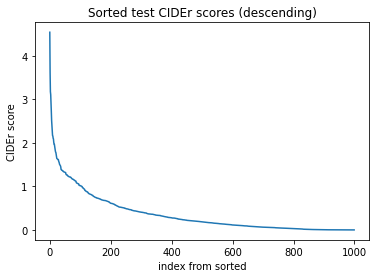

In [ ]:
test_pred_actual = load(open(base_dir + "pred_and_actual_test.pkl", "rb"))
print('Size=%d' % len(test_pred_actual))

gts_test = {k: v['actual'] for k, v in test_pred_actual.items()}
res_test = [{'image_id': k, 'caption': [v['predicted']]} for k, v in test_pred_actual.items()]

cider = Cider(df='corpus')
test_score, test_scores = cider.compute_score(gts_test, res_test)
print('test mean CIDEr score=%.4f' % score)

test_scores_with_index_sorted = sorted(enumerate(test_scores), key=itemgetter(1), reverse=True)
print('test 10 best scores:')
print(test_scores_with_index_sorted[:10])

plt.plot([x[1] for x in test_scores_with_index_sorted])
plt.ylabel('CIDEr score')
plt.xlabel('index from sorted')
plt.title('Sorted test CIDEr scores (descending)')
plt.show()

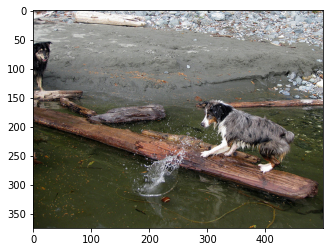

predicted: two dogs are playing in the water
actual: 
dog chases ball that has dropped in the water
dog on log looks at splash in the water as another dog looks on
dogs playing in stream
two dogs are staring at splash in the water
two dogs look at something splashing in the water


In [ ]:
photo_index = test_scores_with_index_sorted[50][0]
res = res_test[photo_index]
photo_id = res['image_id']
photo_path = images_dir + photo_id
photo=plt.imread(photo_path)
plt.imshow(photo)
plt.show()
print('predicted: %s' % res['caption'][0])
print('actual: ')
for c in gts_test[photo_id]:
  print(c)

Size=6000
train mean CIDEr score=0.3670
train 10 best scores:
[(5503, 5.229043380707266), (112, 5.069525741323666), (1552, 5.018778853789216), (4041, 4.7652218779659945), (5574, 4.589488645286061), (3453, 4.4182557663239574), (3675, 4.267249417590575), (5440, 4.22910646294409), (60, 4.1677825750116835), (5457, 4.155924869817053)]


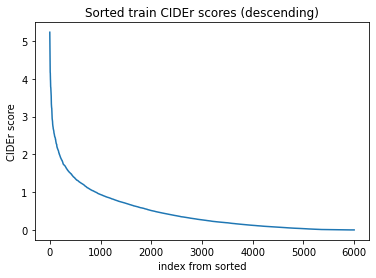

In [ ]:
train_pred_actual = load(open(base_dir + "pred_and_actual_train.pkl", "rb"))
print('Size=%d' % len(train_pred_actual))

gts_train = {k: v['actual'] for k, v in train_pred_actual.items()}
res_train = [{'image_id': k, 'caption': [v['predicted']]} for k, v in train_pred_actual.items()]

cider = Cider(df='corpus')
train_score, train_scores = cider.compute_score(gts_train, res_train)
print('train mean CIDEr score=%.4f' % score)

train_scores_with_index_sorted = sorted(enumerate(train_scores), key=itemgetter(1), reverse=True)
print('train 10 best scores:')
print(train_scores_with_index_sorted[:10])

plt.plot([x[1] for x in train_scores_with_index_sorted])
plt.ylabel('CIDEr score')
plt.xlabel('index from sorted')
plt.title('Sorted train CIDEr scores (descending)')
plt.show()

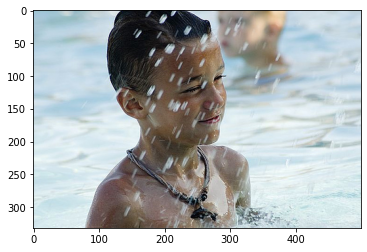

predicted: boy in swimming pool
actual: 
boy in swimming pool
boy is being splashed in swimming pool
boy is standing in pool getting splashed with water
little boy in swimming pool
young boy with necklace on in the water


In [ ]:
photo_index = train_scores_with_index_sorted[4][0]
res = res_train[photo_index]
photo_id = res['image_id']
photo_path = images_dir + photo_id
photo=plt.imread(photo_path)
plt.imshow(photo)
plt.show()
print('predicted: %s' % res['caption'][0])
print('actual: ')
for c in gts_train[photo_id]:
  print(c)